### Agent-based models

In this notebook we'll go over an approach to writing basic agent-based models, building up more complex examples from simple building-blocks.

Agent-based models usually consist minimally of an agent, which can be represented in Python as an class, from which individuals are created as objects; along with a context, which implements the context in which the agents operate.

A bare-bones example, that simply randomly changes state from fals to true, with a probability of 1% with each iteration:

Current system state: 0.01
Current system state: 0.993


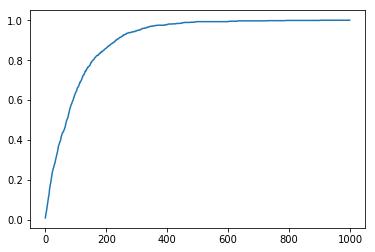

Done!


In [68]:
import pylab as plt
import numpy as np

# This is a minimal agent, which simply blinks randomly on and off. The basic functions are:
#   creation (__init__ constructor) - initializing a new agent to some starting state.
#   current_state - reporting its current state to the context or to other agents.
#   update - updating it's state on request from the context.
class agent:
    def __init__(self):
        self.state = False

    def current_state(self):
        return self.state

    def update(self):
        r = np.random.random()
        if ( r < 0.01 ):
            self.state = True

# This is a minimal agent context, which creates new agents and iterates through timesteps
# updating them.
class context:
    def __init__(self, num_agents):
        # Creat a list of agents
        self.agents = []
        for i in range(num_agents):
            self.agents.append(agent())

    def run(self, iterations):
        # Run the model by iterating through timesteps updating the agents with each one.
        results = []
        for i in range(iterations):
            for a in self.agents:
                a.update()
            num_true = 0
            for a in self.agents:
                if a.current_state() == True:
                    num_true += 1
            current_state = float(num_true)/ float(len(self.agents))
            results.append(current_state)
            if i % 500 == 0:
                print("Current system state: " + str("{0:.3g}".format(current_state)))
        return results
    
def run():
    c = context(num_agents=1000)
    results = c.run(1000)
    plt.plot(range(len(results)), results)
    plt.show()
    print("Done!")

run()

Just like we did at the very beginning of the fall semester, we can iterate over our simulation multiple times to see how it varies.

Current system state: 0.011
Current system state: 0.986
Current system state: 0.012
Current system state: 0.997
Current system state: 0.004
Current system state: 0.993
Current system state: 0.01
Current system state: 0.994
Current system state: 0.012
Current system state: 0.995
Current system state: 0.011
Current system state: 0.997
Current system state: 0.009
Current system state: 0.997
Current system state: 0.007
Current system state: 0.994
Current system state: 0.008
Current system state: 0.996
Current system state: 0.011
Current system state: 0.989


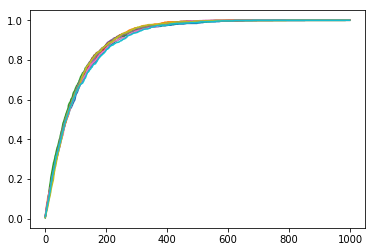

In [69]:
def run():
    all_results = []
    for i in range(10):
        c = context(num_agents=1000)
        results = c.run(1000)
        plt.plot(range(len(results)), results)
        all_results.append(results)
    plt.show()

run()

Here's a variation on that theme that implements the game of life as an agent-based model.  Since each agent updates independently, this implements the asynchronous update pattern described in textbook.

In [70]:
import pylab as plt
import numpy as np

'''
Agent version of game of life
# Game of life rules:
# 1.Any live cell with fewer than two live neighbours dies, as if caused by under-population.
# 2.Any live cell with two or three live neighbours lives on to the next generation.
# 3.Any live cell with more than three live neighbours dies, as if by overcrowding.
# 4.Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.
'''

class agent:
    def __init__(self, x, y):
        self.state = 0
        self.x = x
        self.y = y
        # Initialize a random subset of agents as on.
        if ( np.random.random() < 0.1 ):
            self.state = 1

    def update(self, agentGrid, numX, numY):
        numAdjacentOn = 0
        if (self.x > 0) and (self.x < numX-1) and (self.y > 0) and (self.y < numY-1):
              for j in range(self.y-1, self.y+2):
                for i in range(self.x-1, self.x+2):
                    if (i != self.x) or (j != self.y):
                        numAdjacentOn += agentGrid[i][j].state

        self.nextState = self.state

        if self.state == 1: # This is a live cell
            if numAdjacentOn < 2:
                self.nextState = 0
            if numAdjacentOn > 3:
                self.nextState = 0

        if self.state == 0: # this is a dead cell
            if numAdjacentOn == 3:
                self.nextState = 1
        self.state = self.nextState

class context:
    def __init__(self, numX, numY):
        self.stateGrid = np.zeros((numX, numY))
        self.agentGrid = []
        self.width = numX
        self.height = numY
        for j in range(numY):
            self.agentGrid.append([])
            self.agentGrid[j] = []
            for i in range(numX):
                a = agent(i, j)
                self.stateGrid[j, i] = a.state
                self.agentGrid[j].append(a)

    def run(self, iterations):
        for k in range(iterations):
            for j in range(self.height):
                for i in range(self.width):
                    self.agentGrid[i][j].update(self.agentGrid, self.width, self.height)
                    self.stateGrid[j, i] = self.agentGrid[i][j].state
            plt.matshow(self.stateGrid, cmap=plt.cm.gray)
            plt.savefig('output_{0}.png'.format(k))

def run():
    c = context(25, 25)
    c.run(10)

run()

## Random walks

Completely random

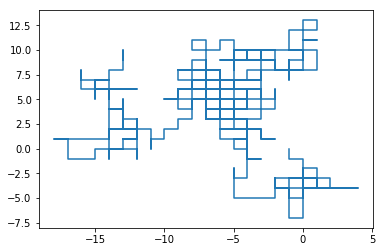

In [72]:
import pylab as plt
import numpy as np

# Simple random walk agent
class agent:
    def __init__(self, r, c):
        self.r = r
        self.c = c
        self.b = 0  # bearing, 0, 1, 2, 3
        self.d = 1  # distance, 1

    def update(self):
        if self.b == 0:
            self.r -= 1  # Go up
        elif self.b == 1: 
            self.c += 1  # Go right
        elif self.b == 2:
            self.c -= 1  # Go left
        else:
            self.r += 1  # Go down
        self.b = np.random.randint(0, 4)
        
    def current_state(self):
        return self.r, self.c

# Grid context
class context:
    def __init__(self, num_agents):
        # Creat a list of agents
        self.agents = []
        for i in range(num_agents):
            self.agents.append(agent(0, 0))

    def run(self, iterations):
        # Run the model by iterating through timesteps updating the agents with each one.
        results = []
        for i in range(iterations):
            for a in self.agents:
                a.update()
                results.append(a.current_state())
        return results
    
def run():
    c = context(num_agents=1)
    results = c.run(500)
    plt.plot([a[0] for a in results], [a[1] for a in results])
    plt.show()

run()

Random with angular bearing and persistence.

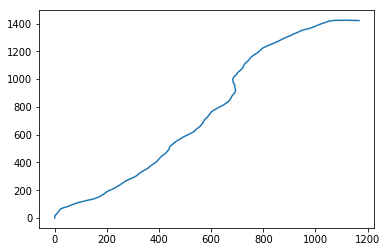

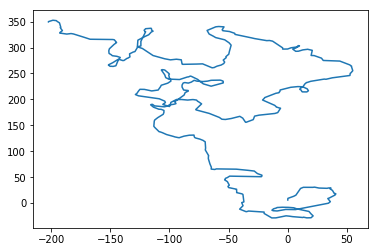

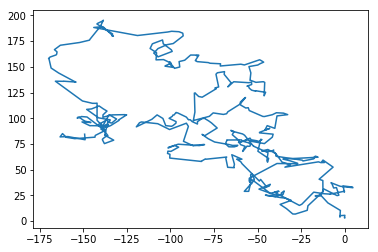

In [73]:
import math

class agent:
    def __init__(self, r, c):
        self.loc = np.array([r, c], dtype=np.float64)
        self.b = 0  # bearing in degrees
        self.d = 1  # distance, 1

    def update(self):
        self.last = self.current_state()
        self.d = np.random.exponential() * 4
        dr = math.sin(math.radians(self.b)) * self.d
        dc = math.cos(math.radians(self.b)) * self.d
        self.loc += np.array([dr, dc])
        self.b += np.random.normal(0, angle)  # Sample from gaussian distribution
        
    def current_state(self):
        return [self.loc[0], self.loc[1]]
    
angle = 5
run()
angle = 35
run()
angle = 80
run()

Random walk with destination.

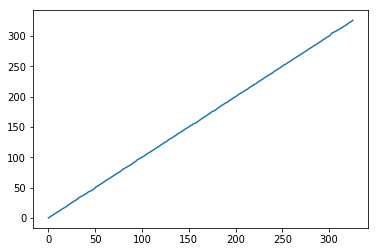

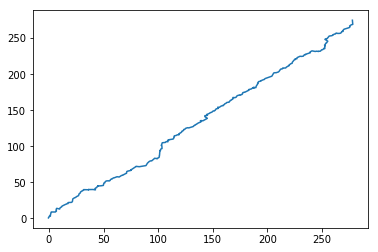

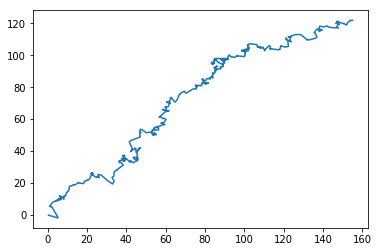

In [74]:
# Simple random walk agent
class agent:
    def __init__(self, r, c):
        self.loc = np.array([0, 0], dtype=np.float64)
        self.b = 0  # bearing in degrees
        self.d = 1  # distance, 1
        self.goal = np.array([500, 500], dtype=np.float64)

    def update(self):
        self.last = self.current_state()
        self.d = np.random.exponential()
        # Generate candidate angles
        distances = []
        angles = range(-90, 90, 10)
        for a in angles:
            dr = math.sin(math.radians(a)) * self.d
            dc = math.cos(math.radians(a)) * self.d
            test_loc = self.loc + np.array([dr, dc])
            a = self.goal - test_loc
            distances.append(np.sqrt(a.dot(a)))
        # Select the one that minimizes the distance to the goal
        index = np.argmin(np.array(distances))
        self.b = np.random.normal(angles[index], angle)
        dr = math.sin(math.radians(self.b)) * self.d
        dc = math.cos(math.radians(self.b)) * self.d
        self.loc += np.array([dr, dc])
        
    def current_state(self):
        return [self.loc[0], self.loc[1]]
    
angle = 5
run()
angle = 35
run()
angle = 80
run()

Random walk with obstacles

Hill-climbing agents

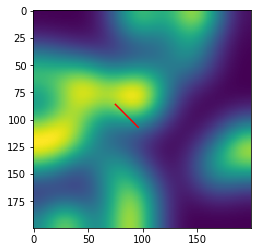

In [75]:
from skimage import morphology
from scipy import ndimage
import pylab as plt
import numpy as np
import math

class agent:

    def __init__(self, r ,c):
        self.r = int(r)
        self.c = int(c)
        self.b = 0  # bearing in degrees
        self.d = 10  # distance
    
    def update(self, hills):
        # Generate candidate angles
        deltas = []
        angles = range(0, 360, 45)
        for a in angles:
            dr = math.sin(math.radians(a)) * self.d
            dc = math.cos(math.radians(a)) * self.d
            new_r = int(round(self.r + dr))
            new_c = int(round(self.c + dc))
            new_r = new_r if new_r < 190 else 190
            new_c = new_c if new_c < 190 else 190
            deltas.append(hills[new_r, new_c] - hills[self.r, self.c])
        # Select the one that maximizes the elevation
        index = np.argmax(np.array(deltas)) 
        if deltas[index] < 0.00001:
            return False
        self.b = angles[index]
        dr = math.sin(math.radians(self.b)) * self.d
        dc = math.cos(math.radians(self.b)) * self.d
        self.r += int(round(dr))
        self.c += int(round(dc))
        return True
    
    def current_state(self):
        return [self.r, self.c]


# Grid context
class context:
    def __init__(self, num_agents):
        # Creat a list of agents
        self.agents = []
        for i in range(num_agents):
            p = np.random.randint(50, 150, size=2)
            self.agents.append(agent(p[0], p[1]))
        arr = (np.random.random(size=(200, 200)) < 0.0004) * 100.0
        self.hills = ndimage.gaussian_filter(arr, sigma=(20, 20), order=0)
        plt.imshow(self.hills)

    def run(self, iterations):
        # Run the model by iterating through timesteps updating the agents with each one.
        results = []
        for i in range(iterations):
            for a in self.agents:
                if not a.update(self.hills):
                    break
                results.append(a.current_state())
        return results

def run():
    c = context(num_agents=1)
    results = c.run(1000)
    plt.plot([a[0] for a in results], [a[1] for a in results], color="red")
    plt.show()

run()